In [1]:
import libpysal as lps
import numpy as np
import esda
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
w = lps.weights.lat2W(4, 4)
y = np.ones(16)
y[0:8] = 0
np.random.seed(12345)
from esda.join_counts import Join_Counts
jc = Join_Counts(y, w)
jc.bb


10.0

In [4]:
jc.crosstab

Neighbor,W,B
Focal,,
W,10.0,1.0
B,3.0,10.0


In [5]:
jc.expected

Neighbor,W,B
Focal,,
W,5.958333,5.041667
B,7.041667,5.958333


In [6]:
jc.chi2

8.479632255856034

In [7]:
jc.chi2_p

0.003591446953916693

In [10]:
jc.p_sim_chi2

0.002

In [11]:
import seaborn as sns

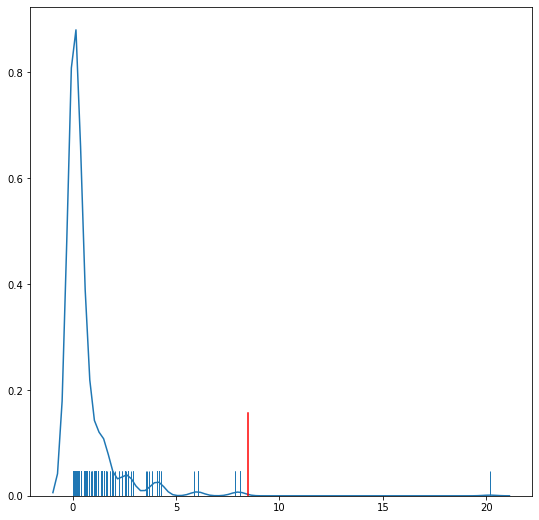

In [12]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(jc.sim_chi2, rug=True, hist=False, ax=ax)
plt.axvline(jc.chi2, 0,0.17, color='r')


Text(0.5, 1.0, 'BB Counts')

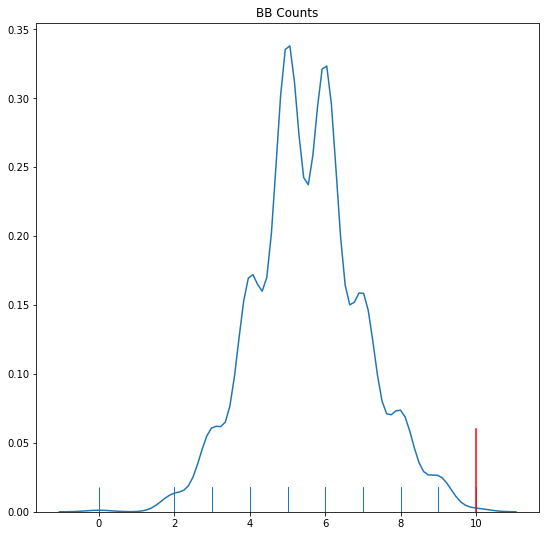

In [16]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(jc.sim_bb, rug=True, hist=False, ax=ax)
plt.axvline(jc.bb, 0,0.17, color='r')
plt.title('BB Counts')


Text(0.5, 1.0, 'WW Counts')

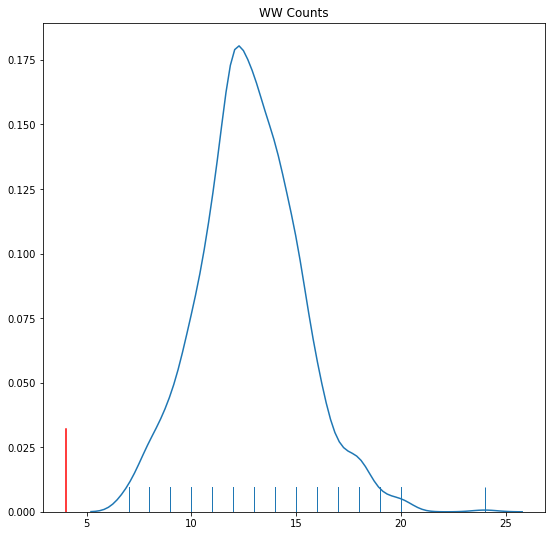

In [15]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(jc.sim_bw, rug=True, hist=False, ax=ax)
plt.axvline(jc.bw, 0,0.17, color='r')
plt.title('WW Counts')
